# House Prices - Model

The lines of code below, imports the relevant libraries and opens the Refined data frame from the `Data_Processing_and_EDA` workbook.
Additionally, it creates a new Data Frame for storing Algorithm results, this will help to track the models that are best suited for the dataset we use.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.DataFrame(columns=['Algorithm','R2 train', 'R2 val', 'MAE train', 'MAE val'])

In [3]:
refined_df = pd.read_csv('data/refined_data.csv')

In [4]:
refined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OverallQual    1460 non-null   int64
 1   YearBuilt      1460 non-null   int64
 2   YearRemodAdd   1460 non-null   int64
 3   TotalBsmtSF    1460 non-null   int64
 4   1stFlrSF       1460 non-null   int64
 5   GrLivArea      1460 non-null   int64
 6   FullBath       1460 non-null   int64
 7   TotRmsAbvGrd   1460 non-null   int64
 8   GarageCars     1460 non-null   int64
 9   GarageArea     1460 non-null   int64
 10  LotConfig      1460 non-null   int64
 11  BldgType       1460 non-null   int64
 12  LotArea        1460 non-null   int64
 13  OverallCond    1460 non-null   int64
 14  2ndFlrSF       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  Fireplaces     1460 non-null   int64
 17  EnclosedPorch  1460 non-null   int64
 18  OpenPorchSF    1460 non-null   int64
 19  WoodDe

The `train_test_split` function is used to split the dataset into relevant training and testing subsets which helps to train and evaluate the performance of the model.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = refined_df['SalePrice']
X = refined_df.drop(columns='SalePrice')

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

Mean Absolute Error (MAE) is a common metric for evaluating regression models, it measures the average absolute difference between the predicted values predicted by the model versus the actual values.

In [8]:
from sklearn.metrics import mean_absolute_error as mae

## Linear Regression

Linear regression is common used in Machine Learning where we need to model the relationship between the target variable and one or more independent variables. The fundamental idea behind it is that it will find the best-fitting linear relationship between the features and the target variable.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
pred_val = lr.predict(X_val)

Linear regression assumes the same relationhip across the features and target variable which leds it to a straight line as seen below, unfortunately, Linear Regression falls down as it fails to fit complex datasets.

The graph below allows this to be plotted as the prediction line does not adapt to fit the True Values from 400,000 and above.

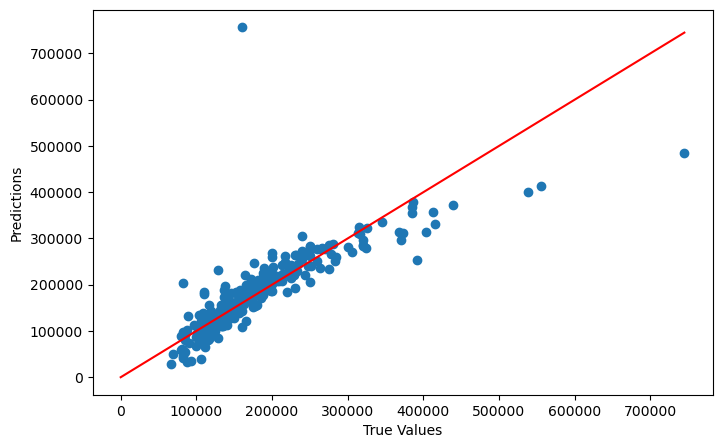

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(y_val, pred_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

The `.score()` function will return the accuracy of the model for both the Training and Validation dataset. The returned value is the model's predictions against the actual values. 

In this instance we use the coefficient of determination ($R^{2}$).

In [14]:
lr_r2_train = lr.score(X_train, y_train)

In [15]:
lr_r2_val = lr.score(X_val, y_val)

In [16]:
lr_r2_train

0.8291984111127044

In [17]:
lr_r2_val

0.6507851917460672

We can then use the Mean Absolute Error function imported earlier to calculate the average absolute difference between the predicted values predicted by the model versus the actual values 

In [18]:
lr_mae_train = mae(y_train, lr.predict(X_train))
lr_mae_val = mae(y_val, lr.predict(X_val))

In [19]:
lr_mae_train

21077.06655057584

In [20]:
lr_mae_val

24909.080193984017

These results are then appended the DataFrame we created earlier in order to track the performance of the algorithms used.

In [21]:
results = results.append({'Algorithm': 'Linear Regression', 'R2 train': lr_r2_train, 'R2 val': lr_r2_val, 'MAE train' : lr_mae_train , 'MAE val': lr_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\2472910292.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Linear Regression', 'R2 train': lr_r2_train, 'R2 val': lr_r2_val, 'MAE train' : lr_mae_train , 'MAE val': lr_mae_val}, ignore_index=True)


In [22]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194


## Scaled Liner Regression

Scaling datasets are important as it ensures that all features in your dataset have a similar scale or range, which can improve model performance. The `StandardScaler` function is imported to scale the dataset, before it is transformed using the `fit_transform` function. This function is used to pre-process the data as it is needed ater scaling or normalisation.

It is important to note that the target variable should not be scaled or transformed.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
col_to_scale = list(refined_df.columns)
col_to_scale.remove('SalePrice')

In [26]:
scaled_data = sc.fit_transform(refined_df[col_to_scale])

In [27]:
scaled_y = refined_df['SalePrice']
scaled_X = scaled_data

In [28]:
scaled_X_train, scaled_X_val, scaled_y_train, scaled_y_val = train_test_split(scaled_X, scaled_y, test_size = 0.25, random_state=1)

In [29]:
scaled_lr=LinearRegression()

In [30]:
scaled_lr.fit(scaled_X_train,scaled_y_train)

LinearRegression()

In [31]:
lr_r2_train = scaled_lr.score(scaled_X_train, scaled_y_train)
lr_r2_val = scaled_lr.score(scaled_X_val, scaled_y_val)

In [32]:
lr_mae_train = mae(scaled_y_train, scaled_lr.predict(scaled_X_train))
lr_mae_val = mae(scaled_y_val, scaled_lr.predict(scaled_X_val))

In [33]:
results = results.append({'Algorithm': 'Scaled LR', 'R2 train': lr_r2_train, 'R2 val': lr_r2_val, 'MAE train' : lr_mae_train , 'MAE val': lr_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\3578943320.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Scaled LR', 'R2 train': lr_r2_train, 'R2 val': lr_r2_val, 'MAE train' : lr_mae_train , 'MAE val': lr_mae_val}, ignore_index=True)


In [34]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352


From the results above, it is a fair conclusion that the scaled dataset overall performs better than the unscaled dataset. This allows us to say that the scaled Linear Regression model would be a better fit for the data, analysing further we can see that despite the significant improvement in valdation accuracy that the scaled datasset performs slightly worse in the training accuracy metric.

This trend continues into the MAE metrics, with the scaled model performing better on validation MAE whereas the unscaled data performs better on training data.

The choice ultimately between the models would be decided by which metric would be more important, the performance on seen or unseen data.

To exhuast all options with Linear Regression, we can use Lasso Linear Regression that includes regularisation...

## Lasso Linear Regression

Lasso Linear Regression includes regularisiation to ensure that the model does not overfit, it can be used when predicting a continious target variable based on mutliple independent features.

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso(alpha=0.95)
lasso.fit(X_train,y_train)
pred_train = lasso.predict(X_train)
pred_val = lasso.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


In [37]:
lasso_r2_train = lasso.score(X_train, y_train)
lasso_r2_val = lasso.score(X_val, y_val)
lasso_mae_train = mae(y_train, pred_train)
lasso_mae_val = mae(y_val, pred_val)

In [38]:
results = results.append({'Algorithm': 'Lasso Regression', 'R2 train': lasso_r2_train, 'R2 val': lasso_r2_val, 'MAE train' : lasso_mae_train , 'MAE val': lasso_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\1919214669.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Lasso Regression', 'R2 train': lasso_r2_train, 'R2 val': lasso_r2_val, 'MAE train' : lasso_mae_train , 'MAE val': lasso_mae_val}, ignore_index=True)


In [39]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164


Linear Regression can only take us so far, Lasso Regression has unlocked a slight improvement on MAE but nothing major.

The similarities between Linear Regression and Lasso Regression are clear to see, Lasso regression allows for a slight improvement in the MAE metrics. The same impact would occur if Lasso regression were used on the scaled dataset. We will now move on to different types of regression. However, if scaled Linear Regression is the highest performing model, then it would be worth performing Lasso Regression again.

## Polynomial Regression

An extension of linear regression (straight line), polynomial regression represents the relationship between the independent features and the target variable `Sale Price` as a Polynomial Curve.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

Similar to the standard scaler used previously, allows for the data to be transformed to suit a polynomial regression. The function takes in the parameter `degree` this can be set to generate specific degrees of polynomials.

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)

In [42]:
poly_feat = PolynomialFeatures(degree=2, include_bias = False)

In [43]:
X_train_poly = poly_feat.fit_transform(X_train)

In [44]:
X_val_poly = poly_feat.fit_transform(X_val)

In [45]:
poly_model = LinearRegression()

In [46]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [47]:
poly_r2_train = poly_model.score(X_train_poly, y_train)
poly_r2_val = poly_model.score(X_val_poly, y_val)
poly_mae_train = mae(y_train,poly_model.predict(X_train_poly))
poly_mae_val = mae(y_val,poly_model.predict(X_val_poly))

In [48]:
results = results.append({'Algorithm': 'Polynomial n=2', 'R2 train': poly_r2_train, 'R2 val': poly_r2_val, 'MAE train' : poly_mae_train , 'MAE val': poly_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\1456910983.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Polynomial n=2', 'R2 train': poly_r2_train, 'R2 val': poly_r2_val, 'MAE train' : poly_mae_train , 'MAE val': poly_mae_val}, ignore_index=True)


In [49]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164
3,Polynomial n=2,0.933185,0.723125,14599.744518,21971.565993


In comparison to the previous models, polynomial regression performs better across training data, however, it struggles across the validation data which is a sign of overfitting for the training data. There are also significant improvements in the MAE metrics, which shows that on average the average error is less which points to potential anomalies...

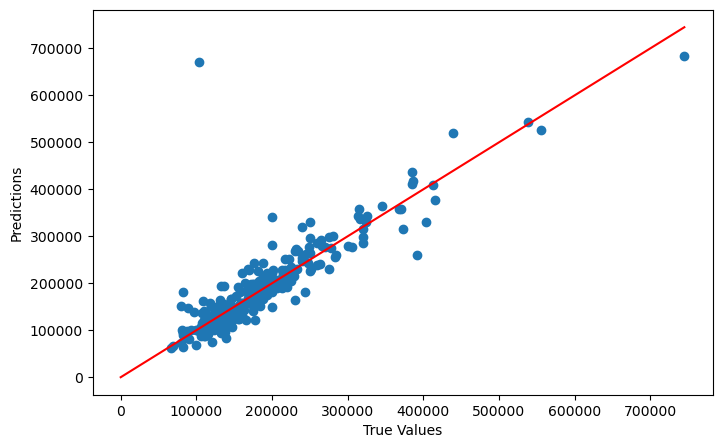

In [50]:
poly_pred_val = poly_model.predict(X_val_poly)
plt.figure(figsize=(8,5))
plt.scatter(y_val, poly_pred_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

The graph depicts a second-degree Polynomial Regression model that, demonstrates good performance as a whole. However, the model is compromised by a single anomaly, that appears on the top-left corner of the graph. This anomaly has a significant impact on the accuracy of the validation data and this is reflected in the value of `0.723`.

## Decision Trees

Decision Trees can be used for classification or regression, it predicts the value of the target variable `Sale Price`. Decision Trees work by making simple decision rules that creates different branches, and they can be displayed as an algorithm that makes conditional control statements.

The amount of conditional control statements is based on the `max_depth` parameter that is passed through when the model is intialised. Increasing the depth can lead to overfitting and increased computational complexity, so it is important to select the appropriate level.

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [53]:
dt_r2_train = regr.score(X_train, y_train)
dt_r2_val = regr.score(X_val, y_val)
dt_mae_train = mae(y_train,regr.predict(X_train))
dt_mae_val = mae(y_val,regr.predict(X_val))

In [54]:
results = results.append({'Algorithm': 'Decision Trees', 'R2 train': dt_r2_train, 'R2 val': dt_r2_val, 'MAE train' : dt_mae_train , 'MAE val': dt_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\1016993710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Decision Trees', 'R2 train': dt_r2_train, 'R2 val': dt_r2_val, 'MAE train' : dt_mae_train , 'MAE val': dt_mae_val}, ignore_index=True)


In [55]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164
3,Polynomial n=2,0.933185,0.723125,14599.744518,21971.565993
4,Decision Trees,0.811926,0.786335,24906.906021,25942.917001


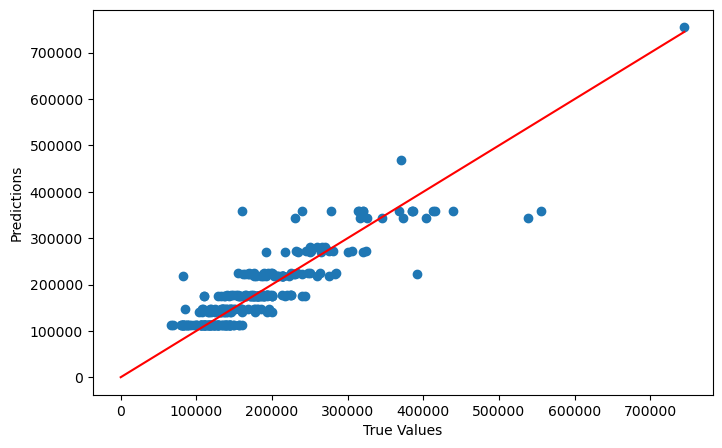

In [56]:
dt_val = regr.predict(X_val)
plt.figure(figsize=(8,5))
plt.scatter(y_val, dt_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

The graph of the Decision Tree regressor highlights how the model using simple conditional statements to calculate the target variable, these are shown a there are clear groups of predictions throughout.

Overall, the Decision Tree model performs more consistently across R2 metrics than the previous models.

## Random Forest

Random Forest is a machine learning model that can perform both regression and classification. It uses an enemble approach to combine different models to create a final accurate prediction.
 
Built on the concept of decision trees, however, each lead node wil represent a ensemble of decision trees. This reduces the effect of overfitting and works well for complex datasets such as the we are using.

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor()

In [59]:
rf.fit(X_train, y_train);

In [60]:
rf_r2_train = rf.score(X_train, y_train)
rf_r2_val = rf.score(X_val, y_val)
rf_mae_train = mae(y_train,rf.predict(X_train))
rf_mae_val = mae(y_val,rf.predict(X_val))

In [61]:
results = results.append({'Algorithm': 'Random Forest', 'R2 train': rf_r2_train, 'R2 val': rf_r2_val, 'MAE train' : rf_mae_train , 'MAE val': rf_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\4260808452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Random Forest', 'R2 train': rf_r2_train, 'R2 val': rf_r2_val, 'MAE train' : rf_mae_train , 'MAE val': rf_mae_val}, ignore_index=True)


In [62]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164
3,Polynomial n=2,0.933185,0.723125,14599.744518,21971.565993
4,Decision Trees,0.811926,0.786335,24906.906021,25942.917001
5,Random Forest,0.979563,0.859481,6888.674690,18265.270063


When compared to the other models, we can see a significant improvemenet in performance for Random Forest across four metrics that we have chosen for analysis. The accuracy of the model does drop off on the validation data and this will be analysed in the graph below.

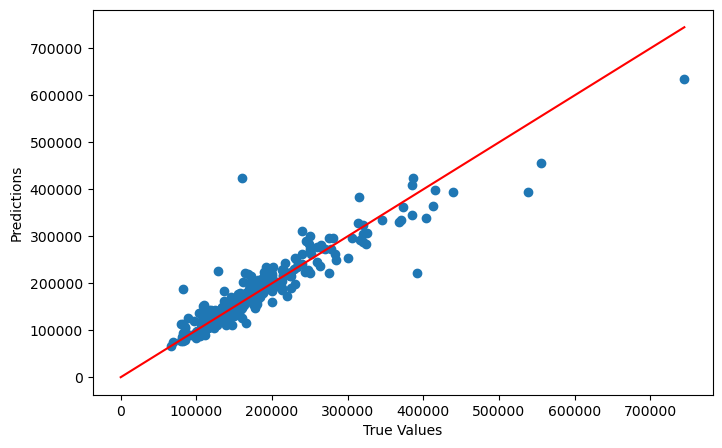

In [63]:
rf_val = rf.predict(X_val)
plt.figure(figsize=(8,5))
plt.scatter(y_val, rf_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

The significant increase in performance of the Random Forest model compared to the other models studied, is evident graph above.

The anomalies that were identified in previous graphs are now closer to the true values, although they are not perfect.

This graph highlights the difference between Decision Trees and the Random Forest models. The ensemble approach of the Random Forest enables the predicted values to be created in less obvious categories.

## Grid Search

The `GridSearch CV` function is used for hyperparameter tuning in machine learning models. It searches for the best performing combination of hyperparameters for your model.

In this discovery, the Random Forest model has significantly outperformed the other models, by using the `GridSearchCV` function we can try to achieve the optimal model for our dataset. 

In [64]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` will cycle through each potential combination of the parameters below to tune the hyperparameters of the model. This however may take a little time.

In [65]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': (50,75,100),
            'min_samples_leaf': (2,4,6,8),
            'n_estimators': (25,50,75,100,125),
        },
        cv=3) 

In [66]:
grid_result = gsc.fit(X_train, y_train)

In [67]:
grid_result.best_params_ 

{'max_depth': 100, 'min_samples_leaf': 2, 'n_estimators': 50}

In [68]:
from sklearn.metrics import r2_score
rfgs_r2_train = r2_score(grid_result.predict(X_train), y_train)
rfgs_r2_val = r2_score(grid_result.predict(X_val), y_val)
rfgs_mae_train = mae(y_train, grid_result.predict(X_train))
rfgs_mae_val = mae(y_val, grid_result.predict(X_val))

In [69]:
results = results.append({'Algorithm': 'Grid Search RF', 'R2 train': rfgs_r2_train, 'R2 val': rfgs_r2_val, 'MAE train' : rfgs_mae_train , 'MAE val': rfgs_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\3021676547.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Grid Search RF', 'R2 train': rfgs_r2_train, 'R2 val': rfgs_r2_val, 'MAE train' : rfgs_mae_train , 'MAE val': rfgs_mae_val}, ignore_index=True)


In [70]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164
3,Polynomial n=2,0.933185,0.723125,14599.744518,21971.565993
4,Decision Trees,0.811926,0.786335,24906.906021,25942.917001
5,Random Forest,0.979563,0.859481,6888.674690,18265.270063
6,Grid Search RF,0.960858,0.817013,8402.097840,18349.898467


Interestingly enough the default Random Forest model performs better than the hyperparameter tuned model with `GridSearchCV`. There are many different reasons this may be the case including:
- The default model is close to optimal for the dataset and the function is unable to offer substantial improvements.
- The `GridSearchCV`values used do not allow for the optimal combination to be chosen
- and many more...

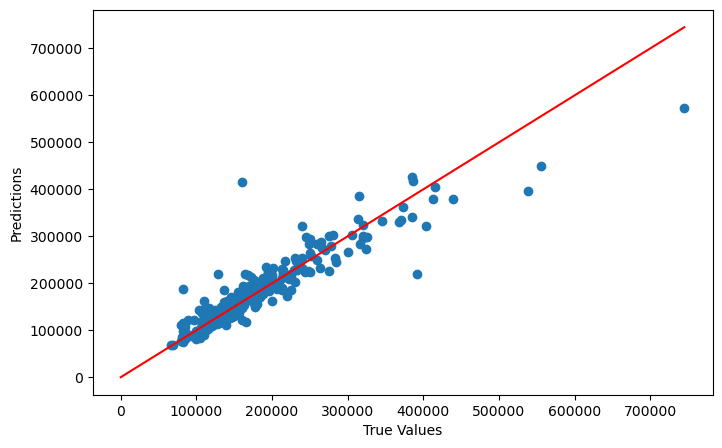

In [71]:
gsc_val = gsc.predict(X_val)
plt.figure(figsize=(8,5))
plt.scatter(y_val, gsc_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

## Randomised Search CV

A different approach to finding the optimal hyperparameters is called `RandomizedSearchCV` which is also avaliable from the `scikit-learn` library. It offers a better search efficiency if computational resources are a concern, you can use Random Search to highlight a promising area and then Grid Search to find the optimal hyperparameters.

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_search = RandomizedSearchCV(
        estimator=RandomForestRegressor(),
        param_distributions={
            'max_depth': randint(1, 20),
            'min_samples_leaf': randint(1, 20),
            'n_estimators': randint(10, 200),
        },
        n_iter=10,
        cv=3,)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016E55BFE760>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016E53862820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016E55BFE1F0>})

In [73]:
random_search.best_params_ 

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 72}

In [74]:
rs_r2_train = r2_score(random_search.predict(X_train), y_train)
rs_r2_val = r2_score(random_search.predict(X_val), y_val)
rs_mae_train = mae(y_train, random_search.predict(X_train))
rs_mae_val = mae(y_val, random_search.predict(X_val))

In [75]:
results = results.append({'Algorithm': 'Random Search RF', 'R2 train': rs_r2_train, 'R2 val': rs_r2_val, 'MAE train' : rs_mae_train , 'MAE val': rs_mae_val}, ignore_index=True)

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_18632\3046625119.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Algorithm': 'Random Search RF', 'R2 train': rs_r2_train, 'R2 val': rs_r2_val, 'MAE train' : rs_mae_train , 'MAE val': rs_mae_val}, ignore_index=True)


In [76]:
results

,Algorithm,R2 train,R2 val,MAE train,MAE val
0,Linear Regression,0.829198,0.650785,21077.066551,24909.080194
1,Scaled LR,0.780732,0.826103,22503.308689,22574.392352
2,Lasso Regression,0.829198,0.650772,21076.750588,24908.739164
3,Polynomial n=2,0.933185,0.723125,14599.744518,21971.565993
4,Decision Trees,0.811926,0.786335,24906.906021,25942.917001
5,Random Forest,0.979563,0.859481,6888.674690,18265.270063
6,Grid Search RF,0.960858,0.817013,8402.097840,18349.898467
7,Random Search RF,0.959223,0.811049,8327.449120,18642.484215


Similar to the Grid Search, the Randomised Search model has been unable to offer significant improvement in performance compared the the default Random Forest model. For future improvements, we can utilise more hyperparameter tuning to try and improve the Random Forest performance. This could include using both Randomised Search and then Grid Search as detailed above.

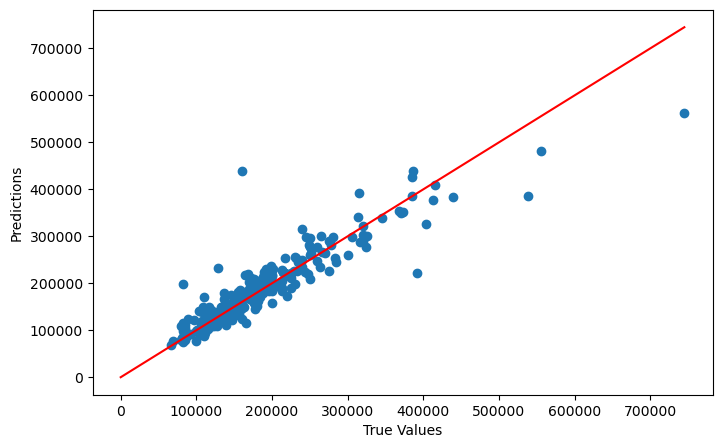

In [77]:
rs_val = random_search.predict(X_val)
plt.figure(figsize=(8,5))
plt.scatter(y_val, rs_val)
plt.plot([0,y_val.max()], [0, y_val.max()], color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions');

The performance of both `GridSearchCV`and `RandomisedSearchCV`are similar due to both models selecting similar hyperparameters in the search for the optimal values. More extensive investigation may find new hyperparameters that can offer better performance than the default Random Forest model, however, we do not want to overfit the model to the training data.